<a href="https://colab.research.google.com/github/jopachecoc/aprendizaje_automatico1/blob/main/aprendizajeautomatico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**
##Aprendizaje Automático 1
##Examen 1

Solucionado por:

* Morales Torres Julio
* Pacheco Carrillo Jonathan
* Triana Madrid Joshua
















1. Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.
Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genera un modelo de regresión sin interacción e interpretarlo.

In [2]:
!pip install dfply
!pip install statsmodels
!pip install scikit-learn

# análisis exploratorio

In [1]:
import numpy as np
import pandas as pd
from dfply import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix

file_publi = "/content/sample_data/publicidad.csv"
file_path = "/content/sample_data/data_exam1.xlsx"
df = pd.read_excel(file_path, sheet_name='data1')
df.tail()

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/data_exam1.xlsx'

In [4]:
print(df.dtypes)
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

Y      float64
X      float64
Ind      int64
dtype: object
(1000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None
                 Y            X        Ind
count  1000.000000  1000.000000  1000.0000
mean     46.953751     9.976858     0.2000
std      22.046143     3.762567     0.4002
min     -34.894319    -4.263757     0.0000
25%      32.427643     7.638899     0.0000
50%      45.460252     9.952888     0.0000
75%      61.587567    12.379984     0.0000
max     135.542574    25.628678     1.0000
Y      0
X      0
Ind    0
dtype: int64
0


In [ ]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,Y,X,Ind
Y,1.000000,0.832057,-0.237224
X,0.832057,1.000000,0.024069
Ind,-0.237224,0.024069,1.000000



* SOLUCIÓN: tenemos 1000 datos 3 variables X, Y e Ind que es una variable dicotómica toma valores en 0 y 1, en la data no contamos con valores  nulos o información perdida, tambien calculamos la correlación de pearson que toma un valor de 0.83 entre X y Y lo cual indica que es viable realizar un modelo de regresión lineal simple, los datos nos permiten generar un modelo, aparte cuando vemos la variable dicotómica ambos grupos tienen un comportamiento lineal casi con la misma pendiente pero desplazada un poco del resto de los datos, (evidencia en el gráfico de dispersión mostrado mas adelante) lo único es que al ver el intercepto ya que se ve muy cerca del cero parece no ser representativo,  por lo cual un modelo sin intercepto parece ser más adecuado para este escenario igual es necesario validar la prueba de hipetesis antes de tomar la decision.

 # Modelo de regresión sin interacción

In [7]:
# Definir la variable independiente (X) y dependiente (Y)
X = df[['X','Ind']]  # Debe ser un DataFrame
Y = df['Y']
model = LinearRegression()
model.fit(X, Y)
X_with_const = sm.add_constant(X)
ols_model = sm.OLS(Y, X_with_const).fit()
print(ols_model.summary())
#ols_modelV1 = sm.OLS(Y, X).fit()
#print(ols_modelV1.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          2.25e-308
Time:                        16:14:18   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.4


SOLUCIÓN: Generando el modelo sin interacción se evidencia que los parámetros y su interpretación son las siguientes:


1. El intercepto $\beta_0$: si suponemos un individuo con toda su información en ceros para (X, Ind) entonces su respectivo valor de Y se estima en 0.78.
2. Pendiente $\beta_1$: Es el cambio en la pendiente por cada unidad que aumenta X si suponemos que la variable ind no afecta, es decir que por cada aumento en una unidad de X la predicción aumentara en 4.91 unidades.
3. Impacto $\beta_2$: Para la variable Ind indica que cuando la observación tenga la cualidad de IND la predicción disminuye en un (-14.17) 14 unidades respectos los que no tienen esa cualidad.


Adicional a esto se evidencia para la prueba de significancia del intercepto la cual toma un P-value es muy alto indicando rechazar $H_0$, concluyendo que el intercepto no es significativo para este modelo.


* Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind.

# Grafico de dispersión





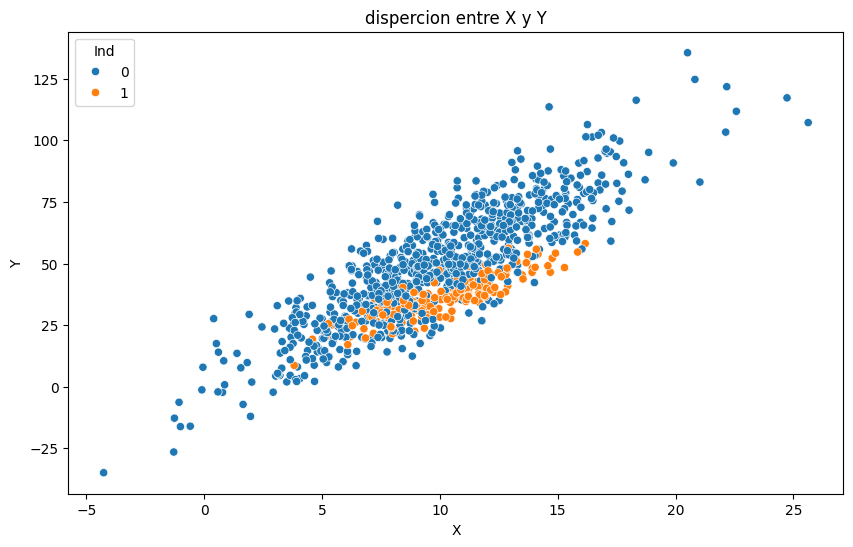

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='Ind', data=df)
plt.title('dispercion entre X y Y')
plt.show()

## ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X?
* SOLUCIÓN: evidenciamos que visualmente existe una correlación lineal positiva entre X y Y lo cual concluye que a medida que crece la medicion en X, crece la medida en Y linealmente.


## ¿Considera que un modelo con interacciones sería más adecuado?
 * SOLUCIÓN: Necesitamos validar los dos modelos y comparar estos para saber cual se ajusta mejor a los datos si el modelo con interacción y el otro.


## Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, intérprete detalladamente los resultados y valide los supuestos del modelo propuesto i iidN(0 2).



# Modelo sin interacción

In [9]:
# Definir la variable independiente (X) y dependiente (Y)
X = df[['X','Ind']]  # Debe ser un DataFrame
Y = df['Y']
# Ajustar el modelo sin interaccion
model = LinearRegression()
model.fit(X, Y)
X_with_const = sm.add_constant(X)
# Ajustar el modelo
ols_model = sm.OLS(Y, X_with_const).fit()
ols_modelV1 = sm.OLS(Y, X).fit()
# Resumen del modelo
print(ols_model.summary())
print(ols_modelV1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          2.25e-308
Time:                        16:59:41   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.4

In [19]:
print('Intercepto:', model.intercept_)
print('Coefficients:', model.coef_)
Y_pred = model.predict(X)
df['Predicted_Y'] = Y_pred

Intercepto: 0.7873270890776709
Coefficients: [  4.91160016 -14.17957698]


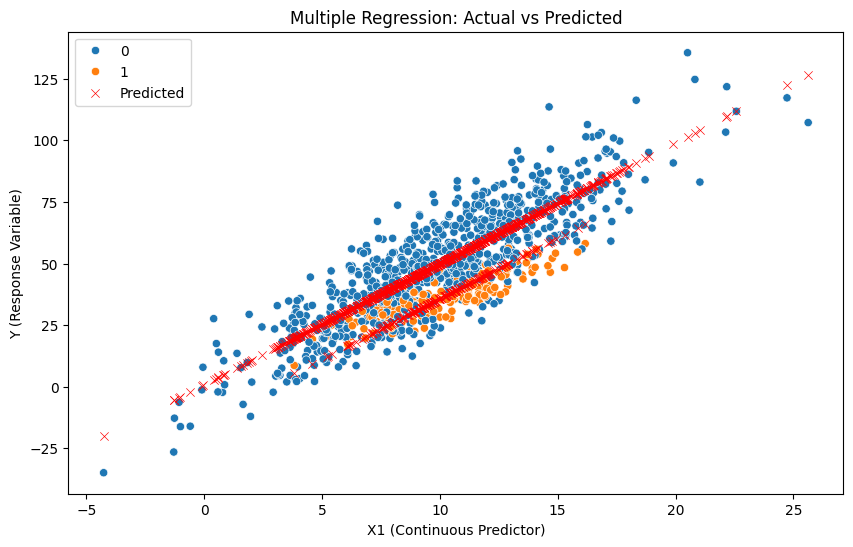

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['X'], y=df['Y'], hue=df['Ind'])
sns.scatterplot(x=df['X'], y=df['Predicted_Y'], color='red', label='Predicted', marker='x')
plt.title('Multiple Regression: Actual vs Predicted')
plt.xlabel('X1 (Continuous Predictor)')
plt.ylabel('Y (Response Variable)')
plt.legend()
plt.show()

# Modelo con interacción e interpretación del mismo

In [22]:
# Definir la variable independiente (X) y dependiente (Y)
df['X1_X2'] = df['X'] * df['Ind']
XX = df[['X','X1_X2']]
Y = df['Y']
# Ajustar el modelo sin interaccion
model2 = LinearRegression()
model2.fit(XX, Y)
#X_with_const2 = sm.add_constant(XX)
# Ajustar el modelo
ols_model2 = sm.OLS(Y, XX).fit()
# Resumen del modelo
print(ols_model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          1.125e+04
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                        0.00
Time:                        17:05:08   Log-Likelihood:                         -3788.3
No. Observations:                1000   AIC:                                      7581.
Df Residuals:                     998   BIC:                                      7590.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

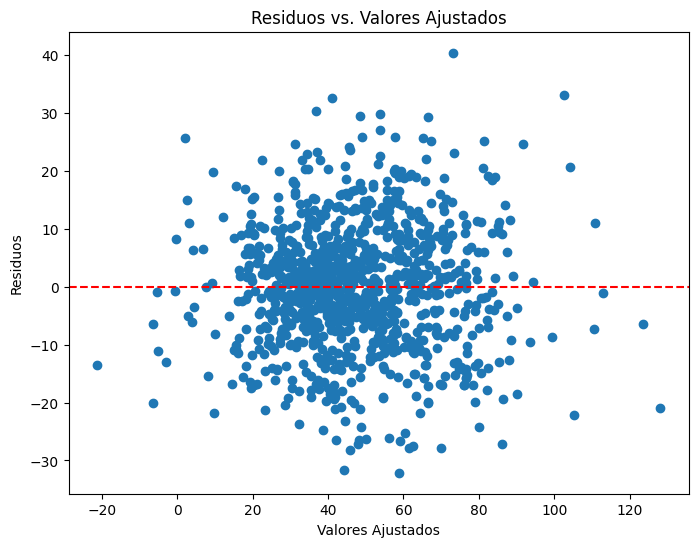

In [32]:
## supuesto de linealidad
# Obtener residuos y valores ajustados
residuals = ols_model2.resid
fitted_values = ols_model2.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

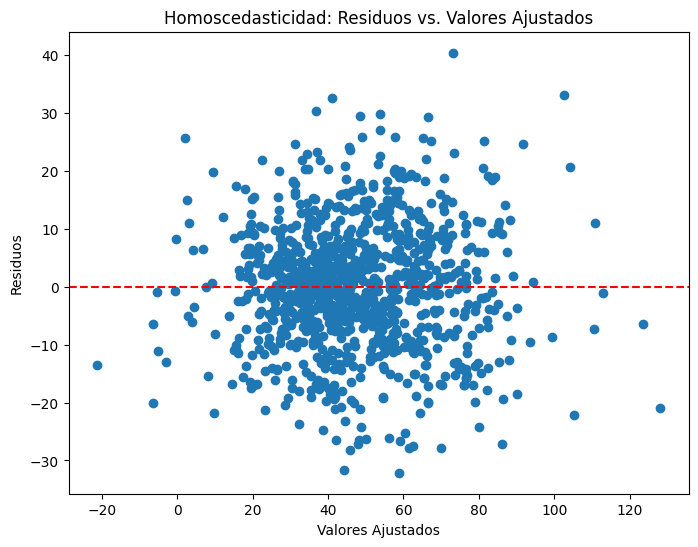

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Homoscedasticidad: Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

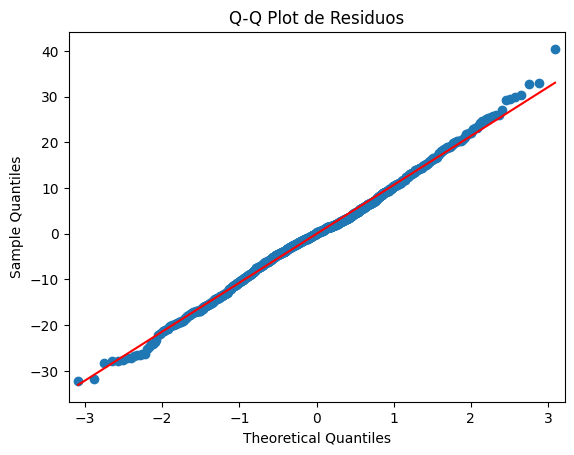

In [ ]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot de Residuos')
plt.show()

* SOLUCIÓN: El modelo con interacción final es el mejor al momento de comparar el AIC de ambos el que me presenta un menor AIC es el modelo con interacción por ello nos quedamos con este y procedemos a la validación de los supuestos.

* $B_1$: Pendiente es 4.99 lo cual indica que por cada unidad en aumento en X la prediccion de Y aumentara en 5 unidades aproximadamente.
* $B_1B_2$ interaccion indica que cuando tenga la cualidad de la segunda variable existirá un cambio adicional en el pronostico. en menos 1.42 veces X1
* Linealidad: Visualmente en el grafico de Residuos vs. Valores Ajustados evidenciamos que no hay linealidad.
* Homocedasticidad: se ve un comportamiento aleatorio indicando que no hay un comportamiento heterocedástico.
* Normalidad de los errores: Como todo se ajusta a la línea vemos que procede de una distribución normal.


# 2. Considere el conjunto de datos “data2” del fichero data_exam1.xlsx
* De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior, proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modelo
εi iid∼ N(0, σ2).

In [33]:
file_path = "/content/sample_data/data_exam1.xlsx"
df2 = pd.read_excel(file_path, sheet_name='data2')
print(df2.describe())
df2.tail()


                 Y             X
count  1000.000000  1.000000e+03
mean      9.445622  7.234805e-02
std       3.908189  9.753985e-02
min     -12.073239  1.343729e-08
25%       7.411486  8.450417e-03
50%      10.072134  3.655172e-02
75%      12.082546  9.992523e-02
max      17.838788  9.397465e-01


,Y,X
995,10.283153,0.053585
996,-5.006186,0.000002
997,13.845597,0.073044
998,14.012956,0.085079
999,11.521064,0.108597


In [ ]:
#como el minimo es -12 la vamos a desplazar hacia la derecha (sumadole 14) para que todos sus valores ean positivos
df2['Yd'] = df2['Y']+14
# 2. Probar transformaciones
df2['log_Y'] = np.log(df2['Yd'])
df2['sqrt_Y'] = np.sqrt(df2['Yd'])
df2['reciprocal_Y'] = 1 / df2['Yd']
df2['log_X'] = np.log(df2['X'])
df2['sqrt_X'] = np.sqrt(df2['X'])
df2['reciprocal_X'] = 1 / df2['X']
df2['Y_boxcox'], lambda_value = stats.boxcox(df2['Yd'])
df2['X_boxcox'], lambda_value = stats.boxcox(df2['X'])
print(f'Box-Cox Lambda: {lambda_value}')


Box-Cox Lambda: 0.2314266670619566


                     Y         X        Yd     log_Y    sqrt_Y  reciprocal_Y  \
Y             1.000000  0.520376  1.000000  0.957140  0.992730     -0.667034   
X             0.520376  1.000000  0.520376  0.439446  0.489279     -0.240911   
Yd            1.000000  0.520376  1.000000  0.957140  0.992730     -0.667034   
log_Y         0.957140  0.439446  0.957140  1.000000  0.984632     -0.842515   
sqrt_Y        0.992730  0.489279  0.992730  0.984632  1.000000     -0.741693   
reciprocal_Y -0.667034 -0.240911 -0.667034 -0.842515 -0.741693      1.000000   
Y_boxcox      0.973856  0.568881  0.973856  0.875993  0.941636     -0.537728   
log_X         0.855568  0.621065  0.855568  0.867260  0.871750     -0.658691   
sqrt_X        0.691458  0.932569  0.691458  0.608441  0.662654     -0.354787   
reciprocal_X -0.232207 -0.033232 -0.232207 -0.457379 -0.317755      0.854991   
X_boxcox      0.794783  0.816656  0.794783  0.732984  0.777763     -0.463983   

              Y_boxcox     log_X    sqr

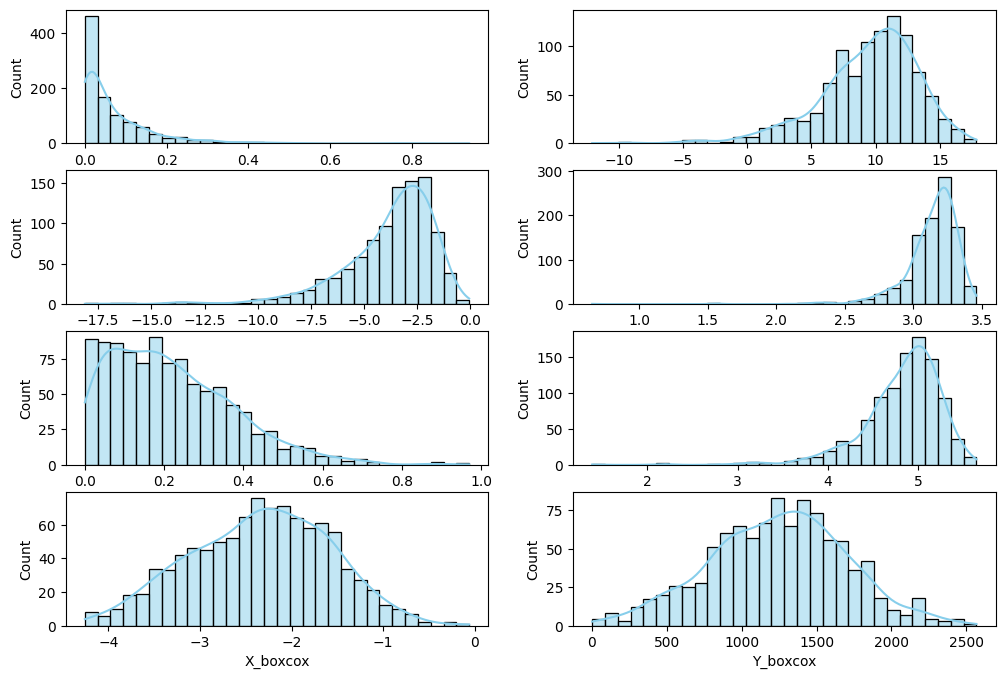

In [ ]:
# Crear el histogramas
# Crear una figura y una grilla de subgráficos
fig, axs = plt.subplots(4, 2, figsize=(12, 8))
#sns.histplot(data1, bins=30, kde=True, color='skyblue', ax=axs[0, 0])
sns.histplot(df2['X'], bins=30, kde=True, color='skyblue', ax=axs[0, 0])
sns.histplot(df2['Y'], bins=30, kde=True, color='skyblue', ax=axs[0, 1])

sns.histplot(df2['log_X'], bins=30, kde=True, color='skyblue', ax=axs[1, 0])
sns.histplot(df2['log_Y'], bins=30, kde=True, color='skyblue', ax=axs[1, 1])

sns.histplot(df2['sqrt_X'], bins=30, kde=True, color='skyblue', ax=axs[2, 0])
sns.histplot(df2['sqrt_Y'], bins=30, kde=True, color='skyblue', ax=axs[2, 1])

sns.histplot(df2['X_boxcox'], bins=30, kde=True, color='skyblue', ax=axs[3, 0])
sns.histplot(df2['Y_boxcox'], bins=30, kde=True, color='skyblue', ax=axs[3, 1])

correlation_matrix = df2.corr(method='pearson')
print(correlation_matrix)



* SOLUCIÓN: Según las gráficas mostradas anteriormente se recomienda la transformación que haga que ambas distribuciones sean similares, para nuestro ejemplo la transformación box-cox y la logarítmica sobre las X hacen que se parezca la distribución a la Y, posterior a esto validamos la correlación lineal entre estas donde se aprecia que ambas son viables pero la mas opcional para nosotros es Logarítmica que representa una correlación más grande (0.855). Validamos esta relación con un diagrama de dispersión entre Y u log(X) mostrado a continuación.

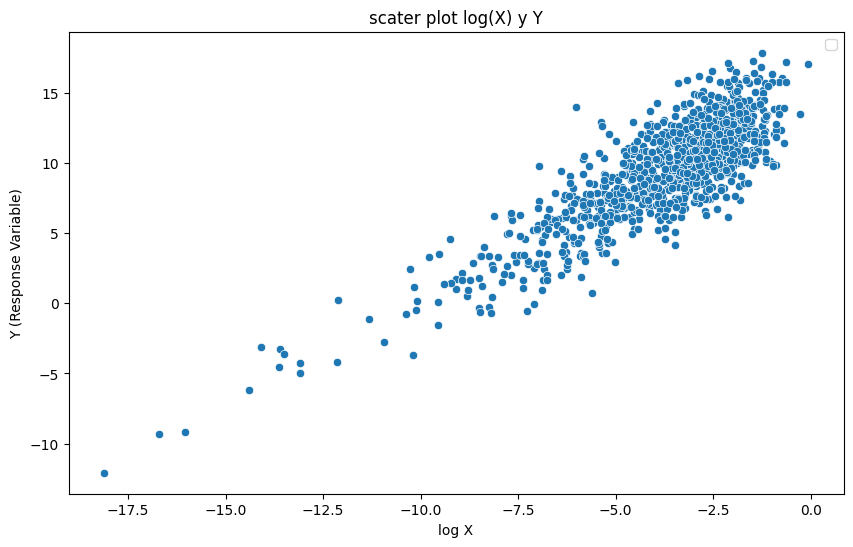

In [ ]:
# validacion grafica
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2['log_X'], y=df2['Y'])
plt.title('Dispersión entre log(X) y Y')
plt.xlabel('log X')
plt.ylabel('Y (Response Variable)')
plt.legend()
plt.show()

# ajustando el modelo

In [ ]:
dff = df2['log_X']
X_with_const = sm.add_constant(dff)
Y = df2['Y']
ols_modelV2 = sm.OLS(Y, X_with_const).fit()
# Resumen del modelo
print(ols_modelV2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2726.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.29e-287
Time:                        19:45:04   Log-Likelihood:                -2123.1
No. Observations:                1000   AIC:                             4250.
Df Residuals:                     998   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1706      0.127    119.481      0.0

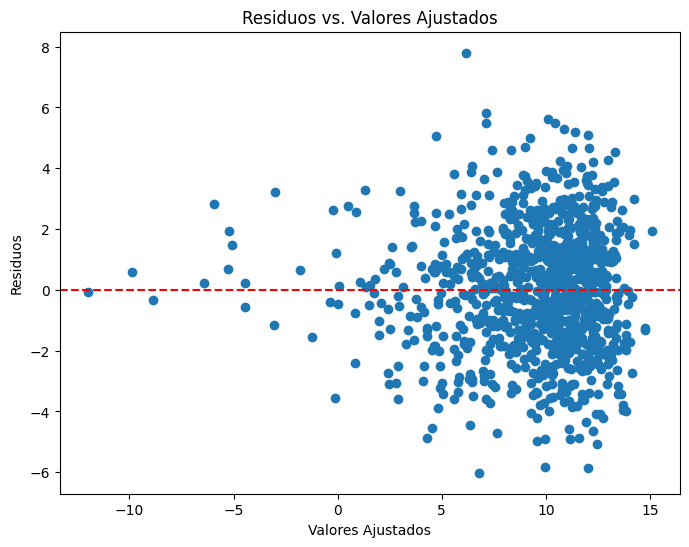

In [ ]:
# Obtener residuos y valores ajustados
residuals = ols_modelV2.resid
fitted_values = ols_modelV2.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

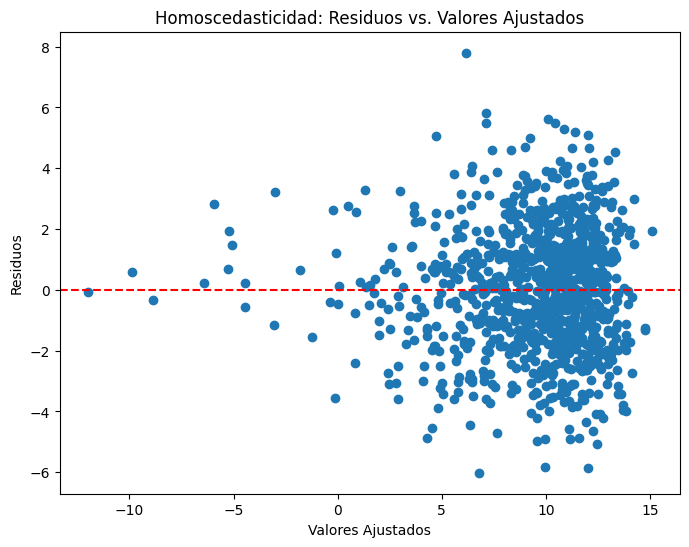

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Homoscedasticidad: Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


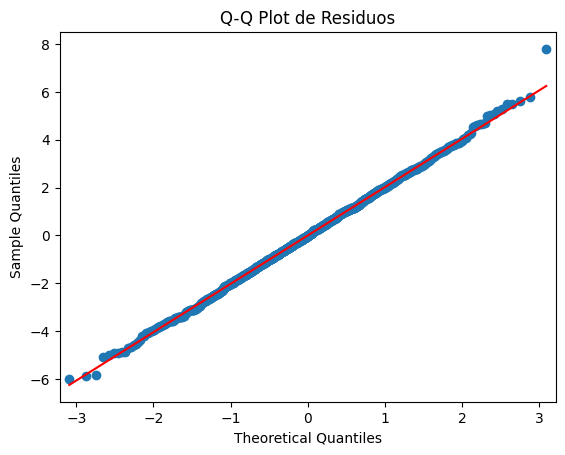

In [ ]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot de Residuos')
plt.show()


SOLUCIÓN:
* autocorrelación: en la tabla anterior como el valor de Durbin es cercado a 2 indicando que no hay autocorrelación
* supuesto de linealidad, se ve en el gráfico un comportamiento aleatorio concluimos linealidad en los datos
* Homocedasticidad, se ve que no existe homocedasticidad, tiene un comportamiento Heterocedástico, a medida que crece la variabilidad crece también o quizá pueden ser algunos valores atípicos.
* Normalidad de los errores: los puntos se ajustan a una línea recta indicando normalidad en sus errores, se evidencia quiza un valor atipico.


# 3 Considere el conjunto de datos “Wine Quality” del fichero datos.xls. Defina como variable  respuesta (Y) la columna Densidad y elimine las variables pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad de Vino.

* Estandarice las variables, calcule las matrices de correlación de Pearson
(P) , Kendall (K) y Spearman (Sp) y compárelas ¿Qué diferencia encuentra entre las estructuras de dependencias obtenidas?

In [2]:
from sklearn.preprocessing import StandardScaler
#file_path = "/content/sample_data/data_exam1.xlsx"

# Read the CSV file
wines_data = pd.read_excel("datos.xls", skiprows=[0,1], sheet_name='Wine Quality')

# View the first 5 rows
wines_data.head()

Y = wines_data['Densidad']
wines_data = wines_data.drop(['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino'], axis=1)
wines_data.head()

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar las variables X
scaled = scaler.fit_transform(wines_data)

# Convertir las variables escaladas a DataFrames (opcional)
scaled_df = pd.DataFrame(scaled, columns=wines_data.columns)
# Se deja la columna densidad (y) en ultima posición para el siguiente punto
new_order = ["Ácido Cítrico", "Azúcar Residual" , "Dióxido de Azúfre Libre" , "Dióxido de Azúfre Total",  "Alcohol", "Densidad"]
scaled_df = scaled_df[new_order]

In [4]:
# Calcular la matriz de correlación de Pearson
correlation_pearson = scaled_df.corr(method='pearson')

# Calcular la matriz de correlación de Kendall
correlation_kendall = scaled_df.corr(method='kendall')

# Calcular la matriz de correlación de Spearman
correlation_spearman = scaled_df.corr(method='spearman')

print("Matriz de correlación de Pearson:")
print(correlation_pearson)
print("\nMatriz de correlación de Kendall:")
print(correlation_kendall)
print("\nMatriz de correlación de Spearman:")
print(correlation_spearman)

# Comparar las matrices de correlación
print("\nDiferencias entre las estructuras de dependencias:")

Matriz de correlación de Pearson:
                         Ácido Cítrico  Azúcar Residual  \
Ácido Cítrico                 1.000000         0.094212   
Azúcar Residual               0.094212         1.000000   
Dióxido de Azúfre Libre       0.094077         0.299098   
Dióxido de Azúfre Total       0.121131         0.401439   
Alcohol                      -0.075729        -0.450631   
Densidad                      0.149503         0.838966   

                         Dióxido de Azúfre Libre  Dióxido de Azúfre Total  \
Ácido Cítrico                           0.094077                 0.121131   
Azúcar Residual                         0.299098                 0.401439   
Dióxido de Azúfre Libre                 1.000000                 0.615501   
Dióxido de Azúfre Total                 0.615501                 1.000000   
Alcohol                                -0.250104                -0.448892   
Densidad                                0.294210                 0.529881   

            

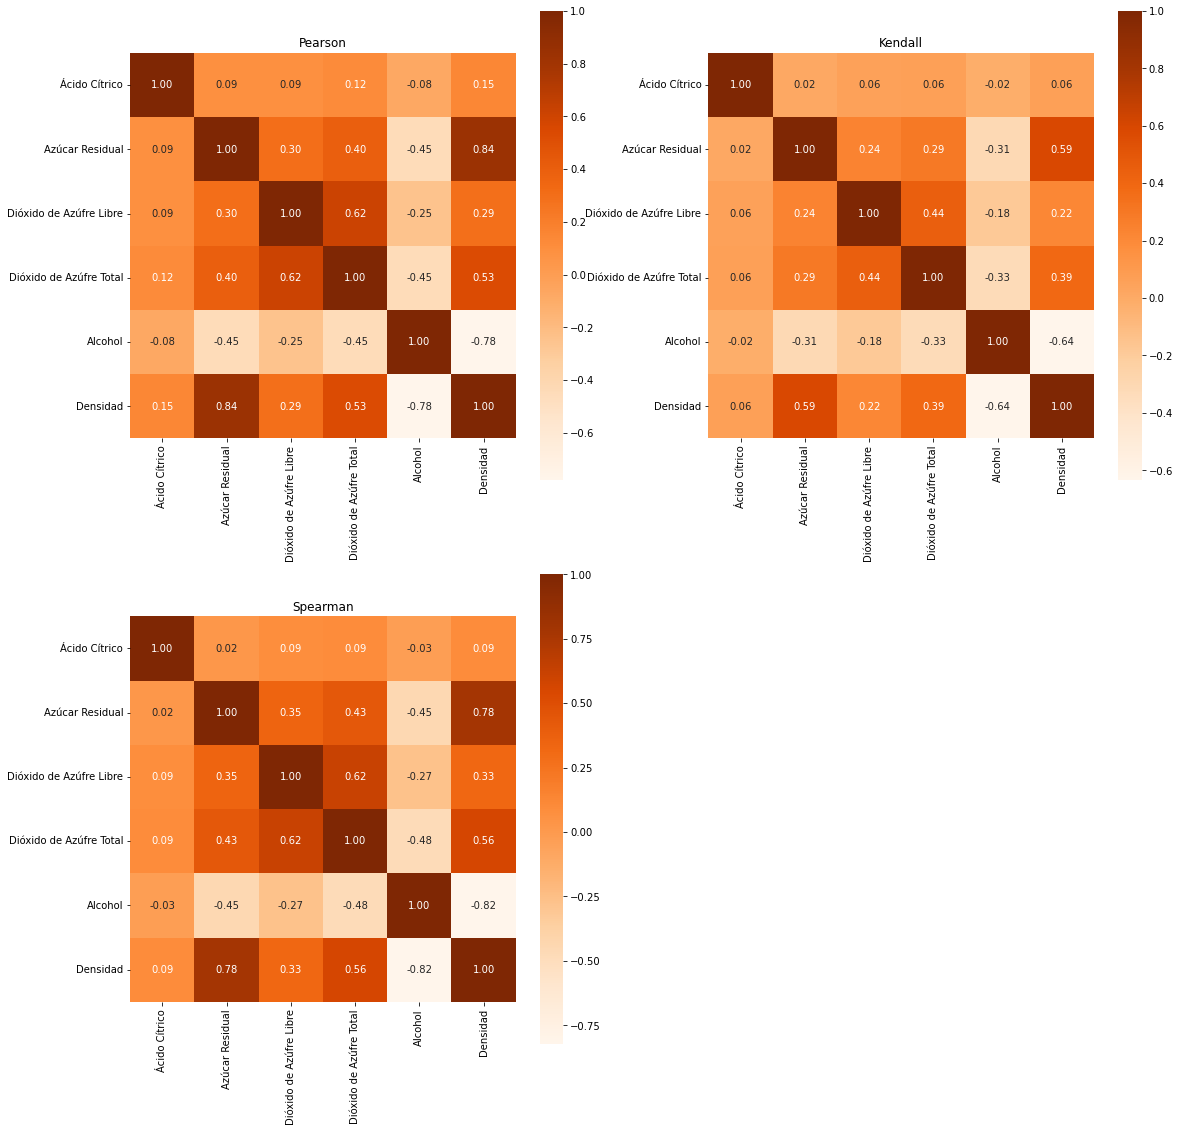

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del tamaño del gráfico
#plt.figure(figsize=(20, 16))
fig, axs = plt.subplots(2,2, figsize=(19, 19))
# Crear el mapa de calor
sns.heatmap(correlation_pearson, annot=True, cmap='Oranges', fmt='.2f', square=True, ax=axs[0,0]) #coolwarm

sns.heatmap(correlation_kendall, annot=True, cmap='Oranges', fmt='.2f', square=True, ax=axs[0,1]) #coolwarm
sns.heatmap(correlation_spearman, annot=True, cmap='Oranges', fmt='.2f', square=True, ax=axs[1,0]) #coolwarm
#plt.title('Mapa de Calor de la Matriz de Correlación Pearson')
axs[0,0].title.set_text('Pearson')
axs[0,1].title.set_text('Kendall')
axs[1,0].title.set_text('Spearman')
axs[1,1].remove()
plt.show()

* SOLUCIÓN: Estudiando el mapa de Pearson, vemos que existe una correlación lineal marcada entre las variables Densidad-Azucar Residual (0.84) y entre las variables Dióxido de Azufre Libre-Dióxido de Azufre Total (0.62). Una correlación más debil existe entre Densidad-Dióxido de Azufre Total (0.56).

Analizando Spearman vemos valores muy similares a Pearson, existe una correlación lineal marcada entre las variables Densidad-Azucar Residual (0.78) y entre las variables Dióxido de Azufre Libre-Dióxido de Azufre Total (0.62). Una correlación más debil existe entre Densidad-Dióxido de Azufre Total (0.56).

Finalmente en Kendall, vemos de nuevo una relación entre Densidad-Azucar Residual (0.59), aunque a diferencia de Pearson esta vez es más debil. Las relaciones anteriores de Azufre Libre-Dióxido de Azufre Total (0.44) y Densidad-Dióxido de Azufre Total (0.39) si bien no son inexistentes, son mucho menores comparadas con los dos estrategias anteriores

* Realice una partición de los datos tipo 80–20, donde el primer 80% de los datos es una muestra de entrenamiento y el restante 20% una muestra de prueba/predicción.

In [6]:
from sklearn.model_selection import train_test_split

new_order = ["Ácido Cítrico", "Azúcar Residual" , "Dióxido de Azúfre Libre" , "Dióxido de Azúfre Total",  "Alcohol", "Densidad"]
wines_data = wines_data[new_order]

df_train, df_test = train_test_split(wines_data, test_size=0.2, random_state=123)

scaler = StandardScaler()

# Ajustar y transformar las variables X
scaled = scaler.fit_transform(wines_data)

df_scaled = pd.DataFrame(scaler.transform(df_train))

* Luego, construya 3 modelos RLM con las matrices estimadas en el primer ítem
 () = 1 ()XX ()XY y 0() = Y X () . Compare e interprete los valores de los co
eficientes de regresión obtenidos por cada método.

In [7]:
# Pearson
SigmaXX = correlation_pearson.iloc[:5, 0:5]
SigmaXy = correlation_pearson.iloc[:5, 5]

beta_sincero = np.linalg.inv(SigmaXX) @ SigmaXy
beta0 = df_scaled.mean(axis = 0)[5] - df_scaled.mean(axis = 0)[:5] @ beta_sincero

betas_pearson = np.hstack((beta0, beta_sincero))
print(betas_pearson)

[-0.00248265  0.05038549  0.59646843 -0.08299052  0.12306553 -0.4730478 ]


In [8]:
# Kendall
SigmaXX = correlation_kendall.iloc[:5, 0:5]
SigmaXy = correlation_kendall.iloc[:5, 5]

beta_sincero = np.linalg.inv(SigmaXX) @ SigmaXy
beta0 = df_scaled.mean(axis = 0)[5] - df_scaled.mean(axis = 0)[:5] @ beta_sincero

betas_kendall = np.hstack((beta0, beta_sincero))
print(betas_kendall)

[-0.00227692  0.03964713  0.4139839  -0.02310357  0.12074798 -0.47267202]


In [9]:
# Spearman
SigmaXX = correlation_spearman.iloc[:5, 0:5]
SigmaXy = correlation_spearman.iloc[:5, 5]

beta_sincero = np.linalg.inv(SigmaXX) @ SigmaXy
beta0 = df_scaled.mean(axis = 0)[5] - df_scaled.mean(axis = 0)[:5] @ beta_sincero

betas_spearman = np.hstack((beta0, beta_sincero))
print(betas_spearman)

[-0.00349836  0.05825041  0.50470699 -0.0815831   0.1252712  -0.55796176]


* SOLUCIÓN: El intercepto con el eje Y es casi el mismo en los modelos.
Las matrices de Person y Spearman generaron matrices muy similares, y esa misma semejanza coincide con los valores de Bs obtenidos en estos modelos

* Realice una predicción con los datos de prueba de acuerdo a los modelos ajustados y calcule el RMSE MSE delapredicción ¿Cuál de los modelos lineales propuestos predice mejor?

RMSE Pearson: 0.2591157384456544


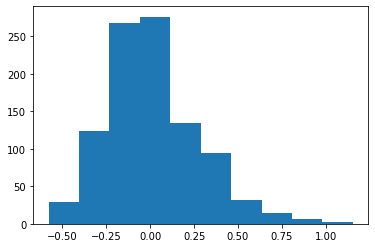

In [10]:
#### Estandarizamos el conjunto de testing usando el scalador del conjunto de training
df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)

#### Extraemos las variables de entrada y le agregamos columna de unos para construir matriz de diseño
X_test = np.column_stack((np.ones(df_test_scaled.shape[0]), df_test_scaled.drop("Densidad", axis = 1).values))

### Calculamos nuestras predicciones y hat del conjunto de testing
y_hat_test_pearson = X_test @ betas_pearson

### Residuales del conjunto de testing
residuales_pearson = df_test_scaled.Densidad - y_hat_test_pearson

RMSE = np.sqrt(sum(residuales_pearson**2)/len(residuales_pearson))

print(f"RMSE Pearson: {RMSE}")
plt.hist(residuales_pearson)
plt.show()

RMSE Kendall: 0.29686572545913836


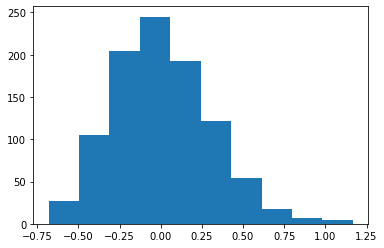

In [11]:
### Se repite el proceso para Kendal
y_hat_test_kendall = X_test @ betas_kendall

residuales_kendall = df_test_scaled.Densidad - y_hat_test_kendall

RMSE = np.sqrt(sum(residuales_kendall**2)/len(residuales_kendall))

print(f"RMSE Kendall: {RMSE}")
plt.hist(residuales_kendall)
plt.show()

RMSE Spearman: 0.2665403975369807


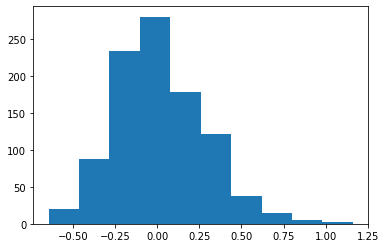

In [12]:
### Se repite el proceso para Spearman
y_hat_test_spearman = X_test @ betas_spearman

residuales_spearman = df_test_scaled.Densidad - y_hat_test_spearman

RMSE = np.sqrt(sum(residuales_spearman**2)/len(residuales_spearman))

print(f"RMSE Spearman: {RMSE}")
plt.hist(residuales_spearman)
plt.show()

* SOLUCIÓN: De nuevo continua la similitud de valores entre Pearson y Spearman, sin embargo el modelo que obtiene un menor valor de RMSE (0.2591157) es Pearson y por tanto sería el modelo lineal propuesto que predice mejor

* Valide los supuestos teóricos de cada modelo i iidN(0 2) y concluya (Recuerde que, independiente del modelo que estime, siempre i = yi yi para i = 1 n).

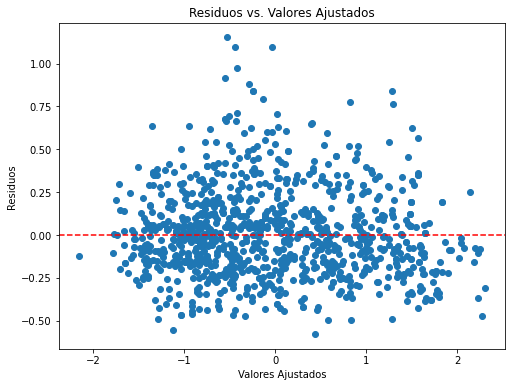

In [13]:
## supuesto de linealidad para Pearson
## Hacer un diagrama de dispersion de los fitness_values y los residuos de Pearson
plt.figure(figsize=(8, 6))
plt.scatter(y_hat_test_pearson, residuales_pearson)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

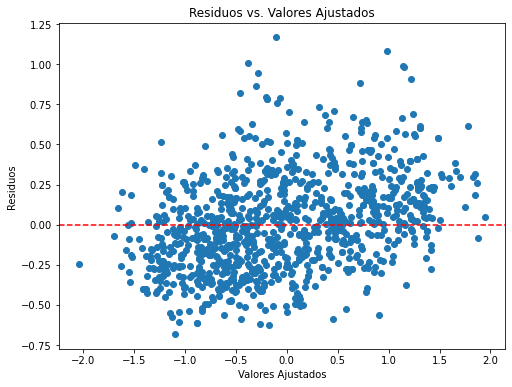

In [14]:
## supuesto de linealidad para Kendall
## Hacer un diagrama de dispersion de los fitness_values y los residuos de Kendall
plt.figure(figsize=(8, 6))
plt.scatter(y_hat_test_kendall, residuales_kendall)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

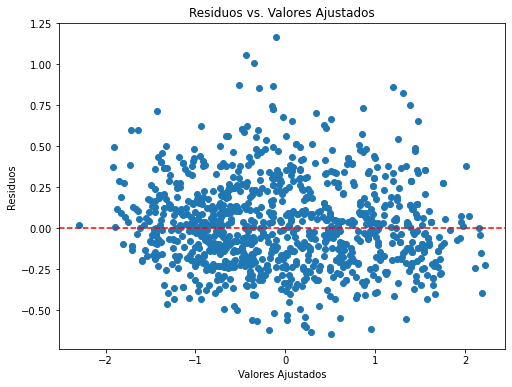

In [15]:
## supuesto de linealidad para Spearman
## Hacer un diagrama de dispersion de los fitness_values y los residuos de Spearman
plt.figure(figsize=(8, 6))
plt.scatter(y_hat_test_spearman, residuales_spearman)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

C:\Users\joshu\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


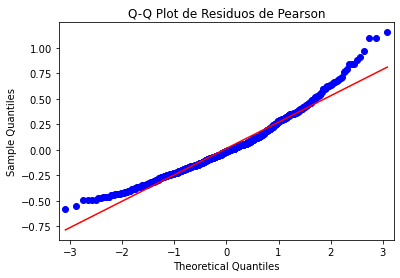

In [16]:
# Normalidad de los errores de Pearson
import statsmodels.api as sm
sm.qqplot(residuales_pearson, line='s')
plt.title('Q-Q Plot de Residuos de Pearson')
plt.show()

C:\Users\joshu\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


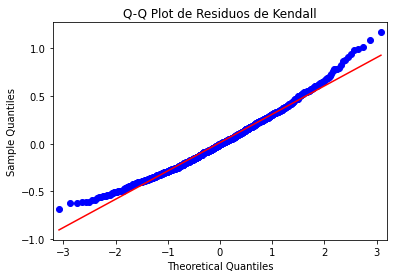

In [17]:
# Normalidad de los errores de Kendall
import statsmodels.api as sm
sm.qqplot(residuales_kendall, line='s')
plt.title('Q-Q Plot de Residuos de Kendall')
plt.show()

C:\Users\joshu\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


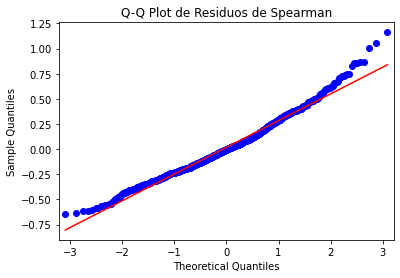

In [18]:
# Normalidad de los errores de Spearman
import statsmodels.api as sm
sm.qqplot(residuales_spearman, line='s')
plt.title('Q-Q Plot de Residuos de Spearman')
plt.show()

* SOLUCIÓN: 

Linealidad: Visualmente en el grafico de Residuos vs. Valores Ajustados evidenciamos que no hay linealidad en ninguno de los 3 modelos.
    

Homocedasticidad: se ve un comportamiento aleatorio indicando que no hay un comportamiento heterocedástico en ninguno de los 3 modelos.


Normalidad de los errores: Como las colas forman una curvatura por fuera de la línea, los 3 modelos no cumplen con la distribución normal.

* Realice un análisis del diagrama de dispersión del conjunto de datos ¿Se evidencian comportamientos totalmente lineales? Si la respuesta es negativa, sugiera y realice transformaciones de variables (Ejemplo: exp(Xi)
 Xi log(Xi) X2 i 1 Xi , etc.) y justifique el por qué de esa transformación. Finalmente, genere un modelo RLM e interprételo detalladamente.

No handles with labels found to put in legend.


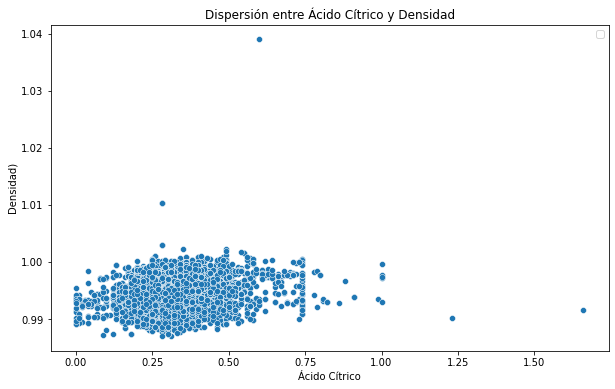

In [19]:
# validacion grafica
#print(wines_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wines_data['Ácido Cítrico'], y=wines_data['Densidad'])
plt.title('Dispersión entre Ácido Cítrico y Densidad')
plt.xlabel('Ácido Cítrico')
plt.ylabel('Densidad)')
plt.legend()
plt.show()

No handles with labels found to put in legend.


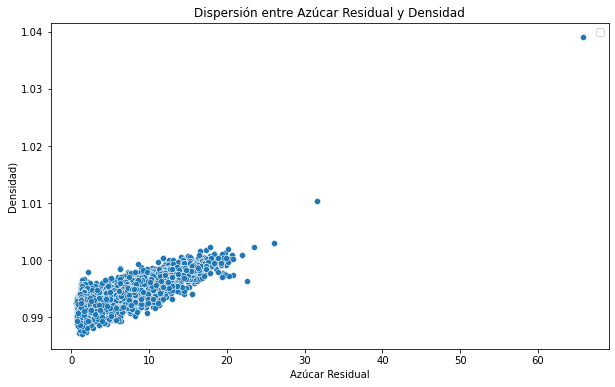

In [20]:
# validacion grafica
#print(wines_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wines_data['Azúcar Residual'], y=wines_data['Densidad'])
plt.title('Dispersión entre Azúcar Residual y Densidad')
plt.xlabel('Azúcar Residual')
plt.ylabel('Densidad)')
plt.legend()
plt.show()

No handles with labels found to put in legend.


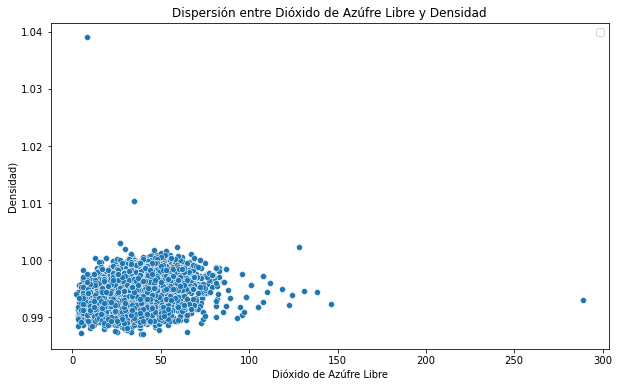

In [21]:
# validacion grafica
#print(wines_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wines_data['Dióxido de Azúfre Libre'], y=wines_data['Densidad'])
plt.title('Dispersión entre Dióxido de Azúfre Libre y Densidad')
plt.xlabel('Dióxido de Azúfre Libre')
plt.ylabel('Densidad)')
plt.legend()
plt.show()

No handles with labels found to put in legend.


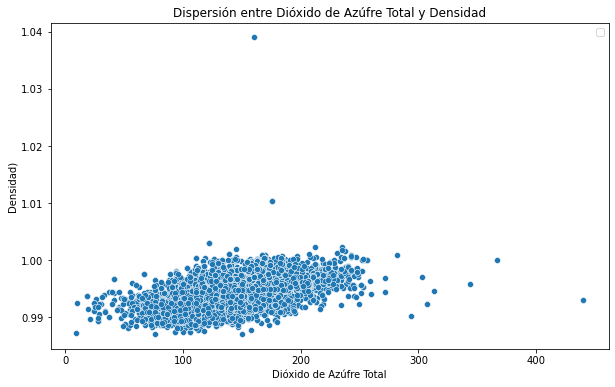

In [22]:
# validacion grafica
#print(wines_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wines_data['Dióxido de Azúfre Total'], y=wines_data['Densidad'])
plt.title('Dispersión entre Dióxido de Azúfre Total y Densidad')
plt.xlabel('Dióxido de Azúfre Total')
plt.ylabel('Densidad)')
plt.legend()
plt.show()

No handles with labels found to put in legend.


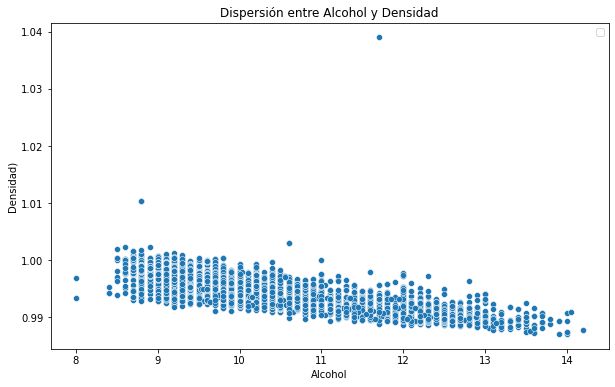

In [23]:
# validacion grafica
#print(wines_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wines_data['Alcohol'], y=wines_data['Densidad'])
plt.title('Dispersión entre Alcohol y Densidad')
plt.xlabel('Alcohol')
plt.ylabel('Densidad)')
plt.legend()
plt.show()

* SOLUCIÓN: 

Las variables de Dióxido de Azúfre Libre y Ácido Cítrico mostraban un comportamiento no lineal.
Se intentaron las transformaciones aprendidas en clase (exp, 1/2, x*2, raiz cuadrada, log, etc) pero ningún termino de formar una línea recta con una pendiente aceptable. La transformación logarítmica fue la más parecida a un comportamiento lineal, razón por la cual se selecciona para la construcción del modelo

No handles with labels found to put in legend.


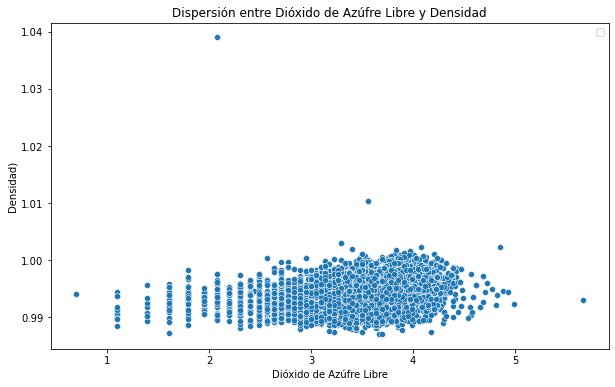

In [87]:
# validacion grafica
#print(wines_data)
plt.figure(figsize=(10, 6))
x = wines_data['Dióxido de Azúfre Libre']
sns.scatterplot(x=np.log(x), y=wines_data['Densidad'])
plt.title('Dispersión entre Dióxido de Azúfre Libre y Densidad')
plt.xlabel('Dióxido de Azúfre Libre')
plt.ylabel('Densidad)')
plt.legend()
plt.show()

[-0.00244774  0.04968589  0.5980749  -0.07947535  0.11976697 -0.47091109]
RMSE Pearson: 0.2607041151437388


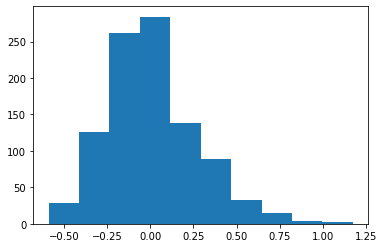

In [88]:
new_order = ["Ácido Cítrico", "Azúcar Residual" , "Dióxido de Azúfre Libre" , "Dióxido de Azúfre Total",  "Alcohol", "Densidad"]
wines_data = wines_data[new_order]

wines_data['Dióxido de Azúfre Libre'] = np.log(wines_data['Dióxido de Azúfre Libre'])

df_train, df_test = train_test_split(wines_data, test_size=0.2, random_state=123)

scaler = StandardScaler()

# Ajustar y transformar las variables X
scaled = scaler.fit_transform(wines_data)
scaled_df = pd.DataFrame(scaled, columns=wines_data.columns)
correlation_pearson = scaled_df.corr(method='pearson')

# Pearson
SigmaXX = correlation_pearson.iloc[:5, 0:5]
SigmaXy = correlation_pearson.iloc[:5, 5]

beta_sincero = np.linalg.inv(SigmaXX) @ SigmaXy
beta0 = df_scaled.mean(axis = 0)[5] - df_scaled.mean(axis = 0)[:5] @ beta_sincero

betas_pearson = np.hstack((beta0, beta_sincero))
print(betas_pearson)

#### Estandarizamos el conjunto de testing usando el scalador del conjunto de training
df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)

#### Extraemos las variables de entrada y le agregamos columna de unos para construir matriz de diseño
X_test = np.column_stack((np.ones(df_test_scaled.shape[0]), df_test_scaled.drop("Densidad", axis = 1).values))

### Calculamos nuestras predicciones y hat del conjunto de testing
y_hat_test_pearson = X_test @ betas_pearson

### Residuales del conjunto de testing
residuales_pearson = df_test_scaled.Densidad - y_hat_test_pearson

RMSE = np.sqrt(sum(residuales_pearson**2)/len(residuales_pearson))

print(f"RMSE Pearson: {RMSE}")
plt.hist(residuales_pearson)
plt.show()

In [ ]:
Se pasó de un modelo de RMSE de 0.2591157384456544 a uno de 0.2607041151437388
Esta transformación no lineal por el contrario de mejorar, empeoro un poco el modelo 
Estos resultados refuerzan la importancia de buscar que las transformaciones si sean lineales para mejorar
la predicción del modelo, y no lo contrario como en este caso

## 4. Se tiene un conjunto de datos que registra la cantidad de anuncios publicitarios en redes sociales que realiza una empresa y su correspondiente retorno de inversión en ventas. Se desea determinar si existe una relación lineal significativa entre la cantidad de anuncios publicitarios y el retorno de inversión. El conjunto de datos “publicidad.csv” consta de 200 observaciones y 4 variables que representan los gastos en publicidad (en miles de dólares) y las ventas (en miles de unidades) de un producto en un mercado específico:- TV: Gasto en publicidad en televisión.- Radio: Gasto en publicidad en radio.- Newspaper: Gasto en publicidad en periódicos.- Sales: Número de unidades vendidas (en miles)

* Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios
 por canal (“TV”, “Radio”, “Newspaper”). Para ello use la función scatter_matrix() del paquete pandas e interprete los graficos de las variables dos a dos, teniendo en cuenta que nuestra variable respuesta es “Sales”.









Según el mapa de calor de coeficientes de correlacion de pearson se ve que la correlacion lienal mas fuerte se
encuetra entre Sales y TV con 0.78 seguida de Sales con Radio un valor de 0.58 y la siguiente correlacion baja
se encuentra entre periodico y radio.



In [8]:
correlation_pearson = scaled_df.corr(method='pearson')



In [9]:
dd = pd.read_csv(file_publi)
dd = dd[['Sales','TV','Radio','Newspaper']]

<Figure size 1000x1000 with 0 Axes>

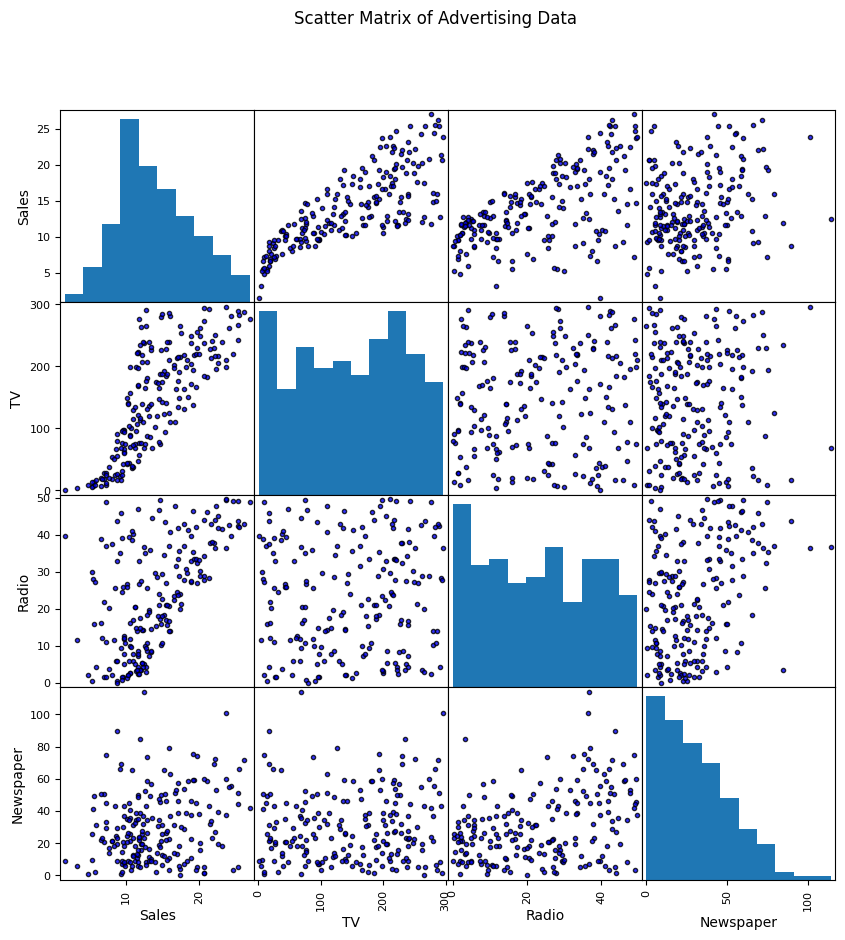

In [10]:
# Generate the scatter matrix
plt.figure(figsize=(10, 10))
scatter_matrix(dd, alpha=0.8, diagonal='hist', figsize=(10, 10), color='blue', edgecolor='black')
plt.suptitle('Scatter Matrix of Advertising Data')
plt.show()

* SOLUCIÓN: Entre ventas y tv se ve que existe una relación lineal entre ellos positiva puede existir algunos valores atípicos que se podrían revisar al inicio también se ve un comportamiento heterocedástico donde para valores altos aumenta la variabilidad.Ventas versus Radio acá se evidencia la misma relación anterior al parecer existe una relación lineal positiva pero ya no es tan marcada como la anterior y también se evidencia la heterocedasticidad. Ventas versus periodico se evidencia una relación lineal positiva muy débil e incluso se puede llegar a que no hay relación de tipo lineal entre estas esto lo podremos ver mucho mejor calculando su correlación.

## Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor represente estas correlaciones. ¿Interprete las estructuras de dependencia encontradas?

In [12]:
correlation_matrix = dd.corr(method='pearson')
print(correlation_matrix)

              Sales        TV     Radio  Newspaper
Sales      1.000000  0.782224  0.576223   0.228299
TV         0.782224  1.000000  0.054809   0.056648
Radio      0.576223  0.054809  1.000000   0.354104
Newspaper  0.228299  0.056648  0.354104   1.000000


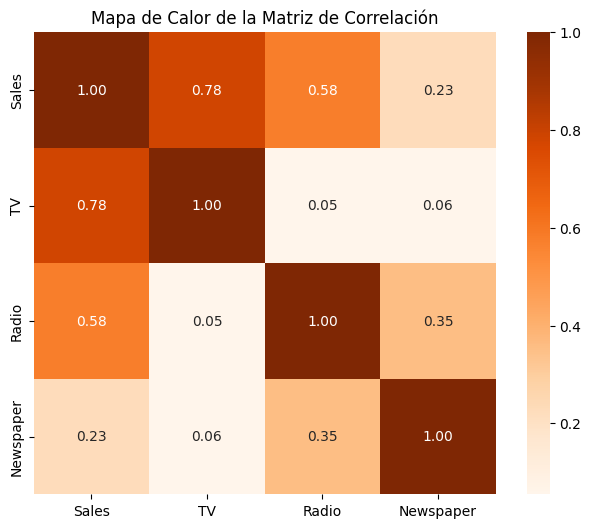

In [13]:

# Configuración del tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f', square=True) #coolwarm
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

* SOLUCIÓN: Según el mapa de calor vemos que existe una correlación lineal marcada entre las variables TV-Sales (0.78) seguida de Sales-Radio de 0.58 y ya una correlación lineal débil entre Radio y Sales de 0.35

## Teniendo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o “Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente de determinación R2? ¿Cómo se interpreta este valor?


In [21]:
# Definir la variable independiente (X) y dependiente (Y)
X = dd[['TV']]  # Debe ser un DataFrame
Y = dd['Sales']
model = LinearRegression()
model.fit(X, Y)
X_with_const = sm.add_constant(X)
ols_model = sm.OLS(Y, X_with_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        22:41:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

* SOLUCIÓN: La variable explicativa más coherente por tener una relación lineal con ventas es la cantidad de dinero invertida en TV, luego de ajustar el modelo de regresión lineal simple para esta se encuentra que la ecuación: $\hat{y}$ = 7.0326 + 0.0475*(TV) (ecuación de la recta) y el coeficiente de determinación $R^2$=0.61 lo cual indica que con la variable de inversión en TV podemos explicar el 61% de las ventas generadas (Sales).

## Realiza una predicción del retorno de inversión esperado cuando se realizan 5 mil dolares gastados en anuncios por el canal de la variable TV. ¿Cuál es el intervalo de confianza del 95% para la predicción?


In [45]:
new_data = pd.DataFrame({'TV': [5, 100]})  # Nuevos valores para X
new_data = sm.add_constant(new_data)  # Agregar constante
new_data
# Realizar predicciones
predictions = ols_model.get_prediction(new_data)
pred_summary = predictions.summary_frame(alpha=0.05)
print(pred_summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   7.270277  0.446269       6.390226       8.150327      0.784168   
1  11.786258  0.262897      11.267820      12.304695      5.339251   

   obs_ci_upper  
0     13.756385  
1     18.233264  


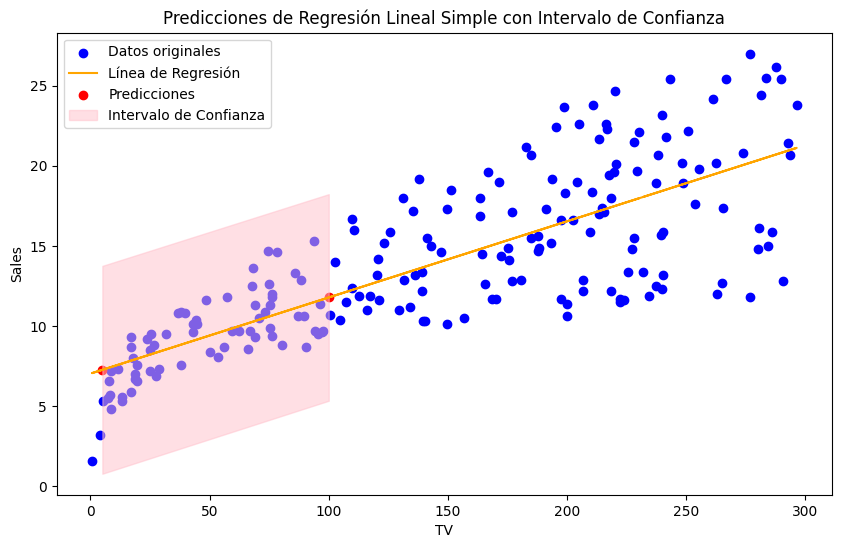

In [52]:
# Gráfico de los datos originales y las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(dd['TV'], dd['Sales'], label='Datos originales', color='blue')
plt.plot(dd['TV'], ols_model.predict(X_with_const), color='orange', label='Línea de Regresión')
# Graficar las predicciones y sus intervalos de confianza
plt.scatter(new_data['TV'], pred_summary['mean'], color='red', label='Predicciones')
plt.fill_between(new_data['TV'],
                 pred_summary['obs_ci_lower'],
                 pred_summary['obs_ci_upper'],
                 color='pink', alpha=0.5, label='Intervalo de Confianza')
plt.title('Predicciones de Regresión Lineal Simple con Intervalo de Confianza')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

SOLUCIÓN: el intervalo de confianza al 95% de confianza para la predicción de 5 mil en inversión en TV es de (0.78-13.5) lo que quiere decir que de seguro 95 de cada 100 inversiones en 5 mil en tv, sus ventas caerán entre (0.78-13.5).